<a href="https://colab.research.google.com/github/kurt980/kurt980/blob/main/527_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [2]:
import statsmodels.api as sm

In [3]:
df = pd.read_csv('/content/sample_data/games.csv')

In [ ]:
df.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [4]:
df = df.dropna(axis=0)

In [90]:
df_1 = df.sample(n = 1000).loc[:,~df.columns.isin(['GAME_DATE_EST', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'GAME_ID', 'SEASON', 'TEAM_ID_home', 'TEAM_ID_away', 'PTS_home', 'PTS_away'])]

In [91]:
x_1 = df_1.loc[:,df_1.columns != 'HOME_TEAM_WINS'].reset_index(drop = True) 
y_1 = df_1.loc[:,df_1.columns == 'HOME_TEAM_WINS'].reset_index(drop = True)

In [92]:
x_num = x_1.select_dtypes(include='number')

In [93]:
x_norm = (x_num - x_num.mean()) / (x_num.max() - x_num.min())

In [94]:
x_1[x_norm.columns] = x_norm

In [ ]:
x_1

In [95]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(x_1))

In [96]:
y_1 = y_1['HOME_TEAM_WINS']

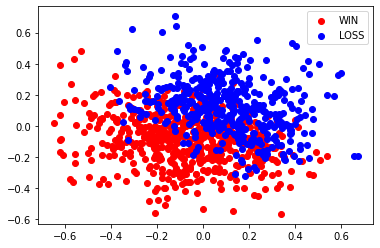

In [97]:
plt.scatter(transformed[y_1==1][0], transformed[y_1==1][1], label='WIN', c='red')
plt.scatter(transformed[y_1==0][0], transformed[y_1==0][1], label='LOSS', c='blue')

plt.legend()
plt.show()

In [122]:
# split train and test by 4:1
x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size=0.2)

Logistic Regression

In [123]:
log_reg = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.378444
         Iterations 7


In [124]:
accuracy_score(y_test, list(map(round, log_reg.predict(x_test))))

0.81

In [ ]:
print(log_reg.summary())

Polynomial Logistic

In [30]:
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias = True)
x_poly = poly.fit_transform(x_train)
x_poly.shape

(400, 66)

In [31]:
log_reg_poly = sm.Logit(y_train, x_poly).fit()

Optimization terminated successfully.
         Current function value: 0.171360
         Iterations 11


In [ ]:
print(log_reg_poly.summary())

In [32]:
accuracy_score(y_test, list(map(round, log_reg_poly.predict(poly.fit_transform(x_test)))))

0.72

Four Factors

In [134]:
dfa = pd.read_csv('/content/sample_data/advanced_box_score_2023.csv', encoding='latin-1')

In [135]:
dfa['W/L'] = pd.get_dummies(dfa['W/L'])['W']

In [ ]:
dfa.head(5)

In [68]:
dfa_1 = dfa.loc[:,~dfa.columns.isin(['TEAM','MATCH_UP','GAME_DATE','MIN','OFFRTG','DEFRTG','NETRTG'])]

In [69]:
xa_1 = dfa_1.loc[:,dfa_1.columns != 'W/L'].reset_index(drop = True) 
ya_1 = dfa_1.loc[:,dfa_1.columns == 'W/L'].reset_index(drop = True)

In [70]:
ya_1 = ya_1['W/L']

In [131]:
# split train and test by 4:1
xa_train, xa_test, ya_train, ya_test = train_test_split(xa_1,ya_1,test_size=0.2)

In [ ]:
log_reg = sm.Logit(ya_train, xa_train.astype(float)).fit()

In [133]:
accuracy_score(ya_test, list(map(round, log_reg.predict(xa_test))))

0.8827586206896552

In [ ]:
# run 10 batches


Robust Regression?